<a href="https://colab.research.google.com/github/Syleshkumar1996/Time-series-forecasting-of-online-search-popularity/blob/main/Craftbeer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import DateOffset
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import prophet
from fbprophet import Prophet

**Dataset**

In [ ]:
df= pd.read_excel('7B21E009.xlsx',sheet_name = "CraftBeer")
df.rename(columns = {'Relative Interest':'Craft Beer'}, inplace = True)
df['time_period']=df['Year'].astype('str') + '-' + df['Month'].astype('str')
df['time_period']=pd.to_datetime(df['time_period'])
df.drop(columns=['Year','Month'],axis=1,inplace=True)
df2=df.set_index('time_period')
df2

,Craft Beer
time_period,
2010-01-01,6
2010-02-01,9
2010-03-01,15
2010-04-01,12
2010-05-01,17
...,...
2015-08-01,84
2015-09-01,75
2015-10-01,66


**MODEL TESTING**

Data preperation

In [ ]:
df3=df2.copy()
df3

,Craft Beer
time_period,
2010-01-01,6
2010-02-01,9
2010-03-01,15
2010-04-01,12
2010-05-01,17
...,...
2015-08-01,84
2015-09-01,75
2015-10-01,66


In [ ]:
df3['SARIMAX']=np.nan
df3['Mean_Baseline']=np.nan
df3['Naive_Baseline']=np.nan
df3['Seasonal_Naive_Baseline']=np.nan
df3['Drift_Baseline']=np.nan
df3['Prophet']=np.nan
df3

,Craft Beer,SARIMAX,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline,Prophet
time_period,,,,,,,
2010-01-01,6,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,9,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,15,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,12,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,17,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2015-08-01,84,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,75,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01,66,NaN,NaN,NaN,NaN,NaN,NaN


**Model testing : SARIMA**

Calculting first order seasonal difference

In [ ]:
df3['Seasonal First order difference']=df3['Craft Beer']-df3['Craft Beer'].shift(12)
df3

,Craft Beer,SARIMAX,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline,Prophet,Seasonal First order difference
time_period,,,,,,,,
2010-01-01,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-08-01,84,NaN,NaN,NaN,NaN,NaN,NaN,14.0
2015-09-01,75,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2015-10-01,66,NaN,NaN,NaN,NaN,NaN,NaN,-3.0


Rechecking for stationarity

In [ ]:
result_cb_first=adfuller(df3.iloc[12:,[7]])
print("p-value",result_cb_first[1])
if result_cb_first[1]<=0.05:
   print("Result of hypothesis testing:Reject Null hypothesis.The data series is stationary")
else:
   print("Result of hypothesis testing:Fail to reject Null hypothesis.The data series is not stationary")

p-value 9.397693723215344e-05
Result of hypothesis testing:Reject Null hypothesis.The data series is stationary


Calculation of Autocorelation and Partial Autocorelation lags

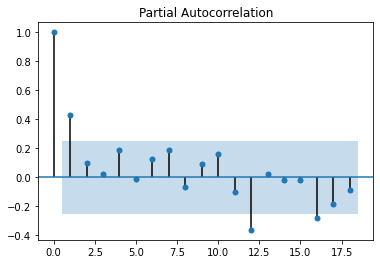

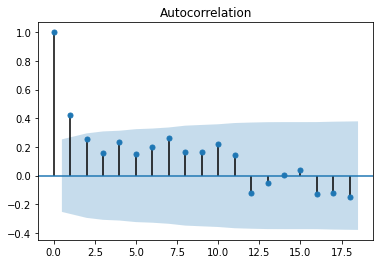

In [ ]:
plot_pacf(df3.iloc[12:,[7]])
plot_acf(df3.iloc[12:,[7]])
plt.show()

In [ ]:
df3.drop(columns='Seasonal First order difference',inplace=True)
df3

,Craft Beer,SARIMAX,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline,Prophet
time_period,,,,,,,
2010-01-01,6,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,9,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,15,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,12,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,17,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2015-08-01,84,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,75,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01,66,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
model_cb=sm.tsa.statespace.SARIMAX(df3.iloc[0:60,[0]],order=(1, 1, 1),seasonal_order=(1,1,1,12))
m_cb=model_cb.fit()
df3['SARIMAX']=m_cb.predict(start=60,end=72,dynamic=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


**Model testing : Mean Baseline**

In [ ]:
for i in range(60,72):
  df3.iloc[[i],2]=df3.iloc[0:60,[0]].mean()

**Model testing : Naive Baseline**

In [ ]:
for i in range(60,72):
  df3.iloc[[i],3]=df3.iloc[[59],[0]]

**Model testing : Seasonal Baseline**

In [ ]:
for i in range(60,72):
  df3.iloc[[i],4]=df3.iloc[[i-12],[0]]

**Model testing : Drift Baseline**

In [ ]:
for i in range(60,72):
  df3.iloc[[i],5]= (df3.iloc[59,0])+ ( ((df3.iloc[59,0] - df3.iloc[0,0])/59 )*(i-59))

**Model testing : Prophet**

In [ ]:
df3_prophet =df
df3_prophet.rename(columns={"Craft Beer":"y","time_period":"ds"},inplace=True)
df3_prophet

,y,ds
0,6,2010-01-01
1,9,2010-02-01
2,15,2010-03-01
3,12,2010-04-01
4,17,2010-05-01
...,...,...
67,84,2015-08-01
68,75,2015-09-01
69,66,2015-10-01
70,66,2015-11-01


In [ ]:
model_prophet_testing=Prophet()
model_prophet_testing.fit(df3_prophet.iloc[0:60,:])
prediction_prophet_testing=model_prophet_testing.predict(df3_prophet.iloc[60:,[1]])
prediction_prophet_testing
for i in range(60,72):
  df3.iloc[[i],6]= prediction_prophet_testing.iloc[[i-60],[15]]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df3

,Craft Beer,SARIMAX,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline,Prophet
time_period,,,,,,,
2010-01-01,6,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,9,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,15,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,12,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,17,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2015-08-01,84,83.307243,37.2,67.0,70.0,75.271186,83.427645
2015-09-01,75,85.709143,37.2,67.0,71.0,76.305085,88.350231
2015-10-01,66,82.542057,37.2,67.0,69.0,77.338983,85.841472


**Comparison of  Testing models**


In [ ]:
model_names=["SARIMAX","Mean Baseline","Naive Baseline","Seasonal Naive Baseline","Drift Baseline","Prophet"]
model_MAPE=[]
model_MAPE.append(round((mean_absolute_percentage_error(df3.iloc[60:72,[0]],df3.iloc[60:72,[1]]))*100,2))   
model_MAPE.append(round((mean_absolute_percentage_error(df3.iloc[60:72,[0]],df3.iloc[60:72,[2]]))*100,2))
model_MAPE.append(round((mean_absolute_percentage_error(df3.iloc[60:72,[0]],df3.iloc[60:72,[3]]))*100,2))
model_MAPE.append(round((mean_absolute_percentage_error(df3.iloc[60:72,[0]],df3.iloc[60:72,[4]]))*100,2))
model_MAPE.append(round((mean_absolute_percentage_error(df3.iloc[60:72,[0]],df3.iloc[60:72,[5]]))*100,2))
model_MAPE.append(round((mean_absolute_percentage_error(df3.iloc[60:72,[0]],df3.iloc[60:72,[6]]))*100,2))

In [ ]:
dict_MAPE={'Model':model_names,'MAPE':model_MAPE}
df_MAPE=pd.DataFrame(dict_MAPE)
df_MAPE

,Model,MAPE
0,SARIMAX,10.63
1,Mean Baseline,50.17
2,Naive Baseline,14.39
3,Seasonal Naive Baseline,12.51
4,Drift Baseline,13.68
5,Prophet,12.48


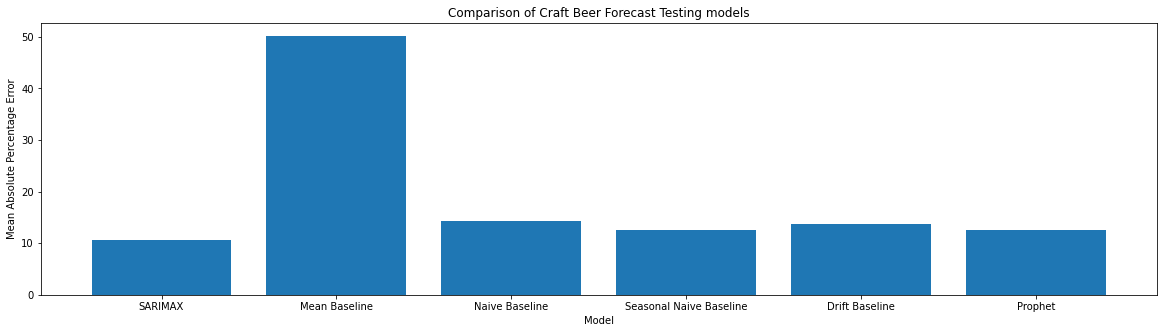

In [ ]:
fig = plt.figure(figsize = (20, 5))
plt.bar(df_MAPE.Model,df_MAPE.MAPE)
plt.xlabel("Model")
plt.ylabel("Mean Absolute Percentage Error")
plt.title("Comparison of Craft Beer Forecast Testing models")
plt.show()

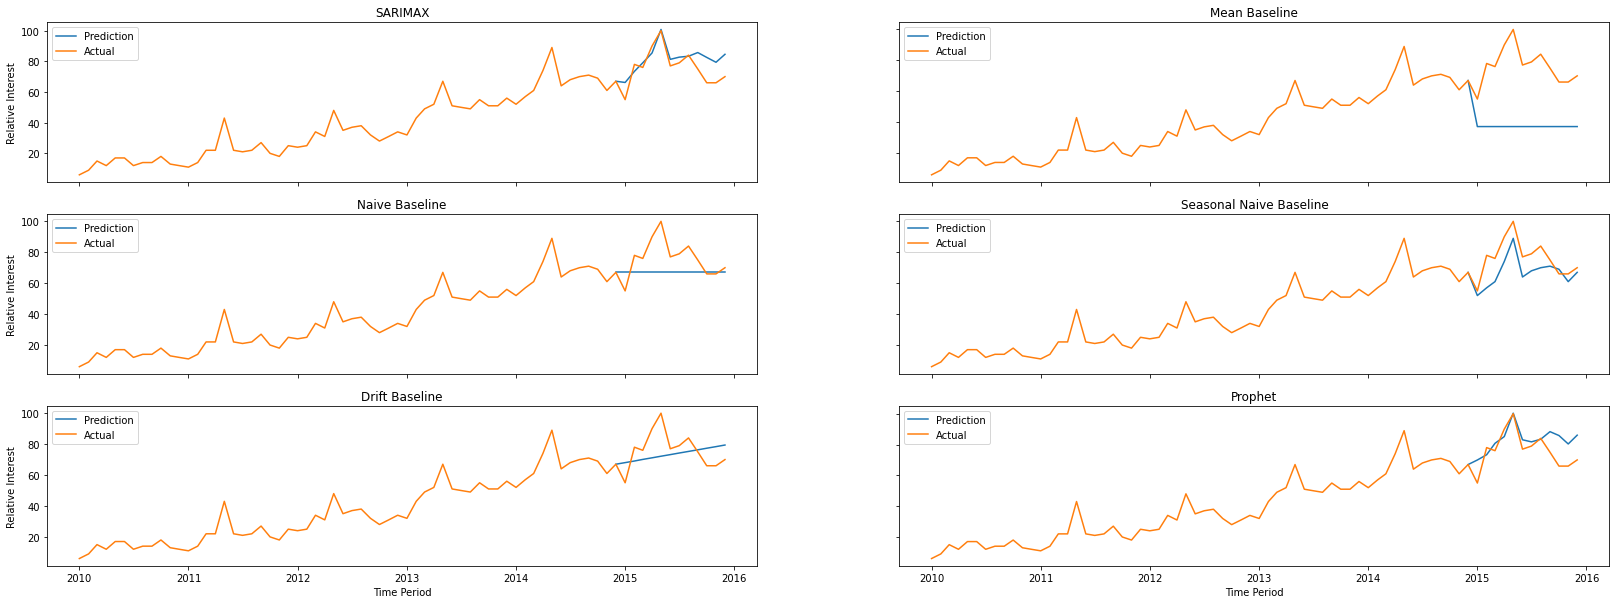

In [ ]:
for i in range(1,7):
  df3.iloc[[59],[i]]=df3.iloc[[59],[0]]
fig,axis=plt.subplots(3,2,figsize=(28,10))
for i in range(0,3):
   for j in range(0,2): 
      axis[i,j].plot(df3.index,df3.iloc[:,[((2*i)+j)+1]])
      axis[i,j].plot(df3.index,df3.iloc[:,[0]])
      axis[i,j].set(title=model_names[((2*i)+j)],xlabel="Time Period",ylabel="Relative Interest")
      axis[i,j].legend(['Prediction', 'Actual'],loc='upper left')
for axi in axis.flat:
    axi.label_outer()

**Forecast models**

In [ ]:
df4=df2.copy()
df4['SARIMAX']=np.nan
df4['Mean_Baseline']=np.nan
df4['Naive_Baseline']=np.nan
df4['Seasonal_Naive_Baseline']=np.nan
df4['Drift_Baseline']=np.nan
df4['Prophet']=np.nan
df4_forecast_dates=[df4.index[-1]+ DateOffset(months=x)for x in range(0,13)]
forecast_datest_df4=pd.DataFrame(index=df4_forecast_dates[1:],columns=df4.columns)
forecast_df4=pd.concat([df4,forecast_datest_df4])
forecast_df4

,Craft Beer,SARIMAX,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline,Prophet
2010-01-01,6,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,9,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,15,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,12,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,17,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2016-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 **Craft Beer Forecast :SARIMAX**

In [ ]:
model_cb_2=sm.tsa.statespace.SARIMAX(df4.iloc[0:72,[0]],order=(2, 1, 2),seasonal_order=(2,1,2,12))
m_cb_2=model_cb_2.fit()
forecast_df4['SARIMAX'] = m_cb_2.predict(start = 72, end = 84, dynamic= True)  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization 

**Craft Beer forecast  : Mean Baseline**

In [ ]:
for i in range(72,84):
  forecast_df4.iloc[[i],2]=forecast_df4.iloc[0:72,[0]].mean()

**Craft Beer forecast : Naive Baseline**

In [ ]:
for i in range(72,84):
 forecast_df4.iloc[[i],3]=df3.iloc[[71],[0]]

**Craft Beer forecast : Seasonal Baseline**

In [ ]:
for i in range(72,84):
  forecast_df4.iloc[[i],4]=forecast_df4.iloc[[i-12],[0]]

**Craft Beer forecast : Drift Baseline**

In [ ]:
for i in range(72,84):
  forecast_df4.iloc[[i],5]= (forecast_df4.iloc[71,0])+ ( ((forecast_df4.iloc[71,0] - forecast_df4.iloc[0,0])/71 )*(i-71))

**Craft Beer forecast : Prophet**

In [ ]:
df4_prophet =forecast_df4.iloc[:,[0]].copy()
df4_prophet=df4_prophet.reset_index()
df4_prophet.rename(columns={"Craft Beer":"y","index":"ds"},inplace=True)
df4_prophet

,ds,y
0,2010-01-01,6
1,2010-02-01,9
2,2010-03-01,15
3,2010-04-01,12
4,2010-05-01,17
...,...,...
79,2016-08-01,NaN
80,2016-09-01,NaN
81,2016-10-01,NaN
82,2016-11-01,NaN


In [ ]:
model_prophet_forecast=Prophet()
model_prophet_forecast.fit(df4_prophet.iloc[0:72,:])
prophet_prediction_forecast=model_prophet_forecast.predict(df4_prophet.iloc[72:,[0]])
for i in range(72,84):
  forecast_df4.iloc[[i],6]= prophet_prediction_forecast.iloc[[i-72],[15]]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Visual representaiton of Craft Beer Forecasting models**

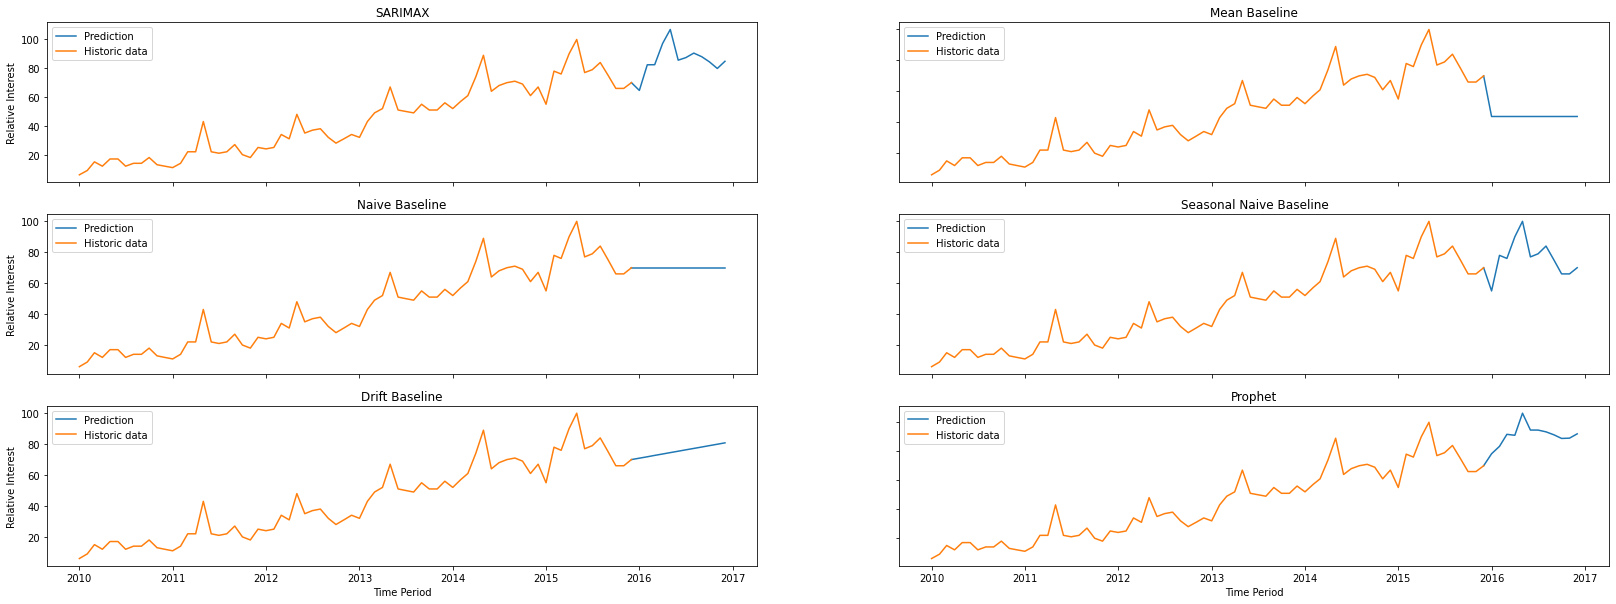

In [ ]:
for i in range(1,7):
  forecast_df4.iloc[[71],[i]]=forecast_df4.iloc[[71],[0]]
fig,axis=plt.subplots(3,2,figsize=(28,10))
for i in range(0,3):
   for j in range(0,2): 
      axis[i,j].plot(forecast_df4.index,forecast_df4.iloc[:,[((2*i)+j)+1]])
      axis[i,j].plot(forecast_df4.index,forecast_df4.iloc[:,[0]])
      axis[i,j].set(title=model_names[((2*i)+j)],xlabel="Time Period",ylabel="Relative Interest")
      axis[i,j].legend(['Prediction', 'Historic data'],loc='upper left')
for axi in axis.flat:
    axi.label_outer()